In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\gaura\jupyter files\minor project\merged_dataset.csv")
df.head()

,PP,timestamp,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,...,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,HR,RMSSD,SCL,Stress_Label
0,PP1,9/18/2012 13:16,0.944941,0.968862,0.023946,0.001300,0.016315,0.002024,0.001087,0.000286,...,0.0,0.0,0.0,0.0,0.0,0.0,73.627107,0.053363,80.239727,1
1,PP1,9/18/2012 13:17,0.930303,0.884570,0.076952,0.001144,0.017392,0.002032,0.000651,0.000344,...,0.0,0.0,0.0,0.0,0.0,0.0,61.000000,0.061420,77.365127,1
2,PP1,9/18/2012 13:18,0.933104,0.931965,0.031468,0.000371,0.023774,0.001722,0.001756,0.000597,...,0.0,0.0,0.0,0.0,0.0,0.0,64.000000,0.049663,77.359559,1
3,PP1,9/18/2012 13:19,0.904466,0.806947,0.105516,0.006459,0.009809,0.001563,0.000441,0.000311,...,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,0.052487,76.728772,1
4,PP1,9/18/2012 13:20,0.929025,0.951412,0.028358,0.001095,0.018130,0.001309,0.003466,0.000286,...,0.0,0.0,0.0,0.0,0.0,0.0,61.000000,0.051189,76.512877,1


In [2]:
from sklearn.preprocessing import StandardScaler

# Identify the features to scale (exclude 'PP' and 'timestamp')
features_to_scale = df.drop(columns=['PP', 'timestamp', 'Stress_Label'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new dataframe with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Concatenate 'PP', 'timestamp', and 'Stress_Label' back with scaled features
df_scaled = pd.concat([df[['PP', 'timestamp']].reset_index(drop=True), scaled_df, df['Stress_Label'].reset_index(drop=True)], axis=1)

# Check the resulting dataframe
print(df_scaled.head())


    PP        timestamp  Squality  Sneutral    Shappy      Ssad    Sangry  \
0  PP1  9/18/2012 13:16  0.495167  1.027205 -0.258789 -0.463671 -0.289402   
1  PP1  9/18/2012 13:17  0.288094  0.649185 -0.031092 -0.464346 -0.284754   
2  PP1  9/18/2012 13:18  0.327718  0.861735 -0.226477 -0.467695 -0.257217   
3  PP1  9/18/2012 13:19 -0.077403  0.301072  0.091611 -0.441325 -0.317474   
4  PP1  9/18/2012 13:20  0.270015  0.948948 -0.239837 -0.464559 -0.281570   

   Ssurprised   Sscared  Sdisgusted  ...  SnDirectionKeys  SnErrorKeys  \
0   -0.474979 -0.258753   -0.301977  ...        -0.275406    -0.669678   
1   -0.474948 -0.260619   -0.301728  ...        -0.275406    -0.669678   
2   -0.476140 -0.255891   -0.300643  ...        -0.275406    -0.669678   
3   -0.476752 -0.261517   -0.301870  ...        -0.275406    -0.669678   
4   -0.477728 -0.248574   -0.301977  ...        -0.275406    -0.669678   

   SnShortcutKeys  SnSpaces  SnAppChange  SnTabfocusChange            HR  \
0       -0.37966

In [3]:
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = df_scaled.drop(columns=['Stress_Label'])
y = df_scaled['Stress_Label']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2493, 156) (624, 156) (2493,) (624,)


KNN Classifier

In [4]:
# Exclude 'PP' and 'timestamp' columns from the feature set
features_to_scale = df.drop(columns=['PP', 'timestamp', 'Stress_Label'])

# Now apply StandardScaler to scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new dataframe with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Now, split the data into features (X) and target (y)
X = scaled_df  # Features
y = df['Stress_Label']  # Target variable

# Now you can proceed with training the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Testing different values of neighbors
neighbors = [1, 5, 10, 20]
knn_scores = {}

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    knn_scores[k] = scores.mean()

# Print the results
print("KNN Scores (for different neighbors):", knn_scores)


KNN Scores (for different neighbors): {1: 0.5819607358933202, 5: 0.5912669259579372, 10: 0.5883812816397086, 20: 0.5970433592624603}


Naive bayes

In [5]:
# Drop the 'PP' and 'timestamp' columns for training
X_train = X_train.drop(columns=['PP', 'timestamp'])
X_test = X_test.drop(columns=['PP', 'timestamp'])


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy on Test Set:", accuracy)


Naive Bayes Accuracy on Test Set: 0.6506410256410257


SVM

In [6]:
from sklearn.svm import SVC

# Test different kernels
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
svm_accuracies = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies[kernel] = accuracy

print("SVM Accuracy on Test Set (different kernels):", svm_accuracies)


SVM Accuracy on Test Set (different kernels): {'linear': 0.7708333333333334, 'poly': 0.8573717948717948, 'sigmoid': 0.6778846153846154, 'rbf': 0.8958333333333334}


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy on Test Set:", accuracy)


Decision Tree Accuracy on Test Set: 0.844551282051282


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", accuracy)


Random Forest Accuracy on Test Set: 0.9166666666666666


In [9]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("MLP Accuracy on Test Set:", accuracy)


MLP Accuracy on Test Set: 0.9246794871794872


In [10]:
print(df['Stress_Label'].value_counts(normalize=True))


Stress_Label
0    0.532563
1    0.467437
Name: proportion, dtype: float64


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Initialize the model
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance of each feature
importances = result.importances_mean

# Display features sorted by importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                                            Feature  Importance
140                                       SnDragged    0.006410
153                                             SCL    0.006090
77             WristLeft_HandLeft-PlaneXYAxisY(avg)    0.004647
40                                 SAu43_EyesClosed    0.004006
55                HipCenter_Spine-PlaneZXAxisX(avg)    0.004006
..                                              ...         ...
113  ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv)   -0.006090
61            ShoulderCenter_Head-PlaneZXAxisX(avg)   -0.006571
122          ElbowLeft_WristLeft-PlaneYZAxisZ(stdv)   -0.007212
89                          leftShoulderAngle(stdv)   -0.007372
112  ShoulderCenter_ShoulderLeft-PlaneXYAxisY(stdv)   -0.007372

[154 rows x 2 columns]


In [12]:
# Print the entire feature_importance DataFrame
print(feature_importance.to_string())


                                                         Feature    Importance
140                                                    SnDragged  6.410256e-03
153                                                          SCL  6.089744e-03
77                          WristLeft_HandLeft-PlaneXYAxisY(avg)  4.647436e-03
40                                              SAu43_EyesClosed  4.006410e-03
55                             HipCenter_Spine-PlaneZXAxisX(avg)  4.006410e-03
25                                          SAu05_UpperLidRaiser  3.846154e-03
102                           HipCenter_Spine-PlaneZXAxisX(stdv)  3.525641e-03
135                                                   SnMouseAct  3.525641e-03
27                                            SAu07_LidTightener  2.724359e-03
109                       ShoulderCenter_Head-PlaneXYAxisY(stdv)  2.724359e-03
147                                               SnShortcutKeys  2.564103e-03
96      ShoulderCenter_ShoulderLeft-ShoulderLeft_Elb

In [13]:
# Select the top 20 features based on importance
top_features = [
    'SnDragged', 'SCL', 'WristLeft_HandLeft-PlaneXYAxisY(avg)', 'SAu43_EyesClosed', 'HipCenter_Spine-PlaneZXAxisX(avg)',
    'SAu05_UpperLidRaiser', 'HipCenter_Spine-PlaneZXAxisX(stdv)', 'SnMouseAct', 'SAu07_LidTightener', 'ShoulderCenter_Head-PlaneXYAxisY(stdv)',
    'SnShortcutKeys', 'ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv)', 'SleftEyebrowLowered', 'HipCenter_Spine-PlaneYZAxisZ(stdv)',
    'SAu20_LipStretcher', 'WristRight_HandRight-PlaneZXAxisX(avg)', 'WristRight_HandRight-KinectZAxis(avg)', 'SnAppChange', 
    'ShoulderRight_ElbowRight-PlaneXYAxisY(stdv)', 'ElbowLeft_WristLeft-WristLeft_HandLeft(avg)'
]

# Create a new dataframe with only the selected features
df_selected_features = df[top_features + ['Stress_Label']]  # Include the target variable

# Split the data into features (X) and target (y)
X_selected = df_selected_features.drop(columns=['Stress_Label'])
y_selected = df_selected_features['Stress_Label']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Train the model using the selected features (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy on Test Set: 0.8621794871794872
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       330
           1       0.89      0.81      0.85       294

    accuracy                           0.86       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.86      0.86      0.86       624



In [14]:
# List of features with non-zero importance values
important_features = [
    'SnDragged', 'SCL', 'WristLeft_HandLeft-PlaneXYAxisY(avg)', 'SAu43_EyesClosed', 'HipCenter_Spine-PlaneZXAxisX(avg)',
    'SAu05_UpperLidRaiser', 'HipCenter_Spine-PlaneZXAxisX(stdv)', 'SnMouseAct', 'SAu07_LidTightener', 'ShoulderCenter_Head-PlaneXYAxisY(stdv)',
    'SnShortcutKeys', 'ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv)', 'SleftEyebrowLowered', 'HipCenter_Spine-PlaneYZAxisZ(stdv)',
    'SAu20_LipStretcher', 'WristRight_HandRight-PlaneZXAxisX(avg)', 'WristRight_HandRight-KinectZAxis(avg)', 'SnAppChange', 
    'ShoulderRight_ElbowRight-PlaneXYAxisY(stdv)', 'ElbowLeft_WristLeft-WristLeft_HandLeft(avg)', 'SnMouseDistance', 'SrightEyebrowLowered',
    'SrightEyebrowRaised', 'SnLeftClicked', 'SnWheel', 'SnRightClicked', 'SnDoubleClicked', 'Ssurprised', 'Sangry', 'Shappy',
    'Sscared', 'Sdisgusted', 'Svalence', 'SxHeadOrientation', 'SyHeadOrientation', 'SleftEyeClosed', 'SrightEyeClosed',
    'SleftEyebrowRaised', 'SrightEyebrowLowered', 'SleftEyebrowLowered', 'SnKeyStrokes', 'SnKeyStrokes'
]

# Create a new dataframe with only the selected features
df_selected_features = df[important_features + ['Stress_Label']]  # Include the target variable

# Split the data into features (X) and target (y)
X_selected = df_selected_features.drop(columns=['Stress_Label'])
y_selected = df_selected_features['Stress_Label']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Train the model using the selected features (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy on Test Set: 0.8878205128205128
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       330
           1       0.93      0.83      0.87       294

    accuracy                           0.89       624
   macro avg       0.89      0.88      0.89       624
weighted avg       0.89      0.89      0.89       624



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize the MLP model
mlp = MLPClassifier(random_state=42)

# Create a list of all parameter combinations
from sklearn.model_selection import ParameterGrid
all_params = list(ParameterGrid(param_grid))

# Progress bar setup
progress_bar = tqdm(total=len(all_params), desc="Hyperparameter Tuning Progress")

# Function to update progress bar during the grid search
class ProgressGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        def wrapped_evaluate(candidates):
            progress_bar.update(len(candidates))
            return evaluate_candidates(candidates)
        super()._run_search(wrapped_evaluate)

# Set up GridSearchCV with progress bar
grid_search = ProgressGridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0  # Silence built-in GridSearchCV verbosity
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Close the progress bar
progress_bar.close()

# Print results
print("\nHyperparameter tuning completed!")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("\nTest Set Accuracy:", test_accuracy)

# Detailed classification report
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Hyperparameter Tuning Progress: 100%|██████████████████████████████████████████████████████████| 216/216 [05:51<00:00,  1.63s/it]


Hyperparameter tuning completed!
Best Parameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best Cross-Validation Score: 0.6867244529219081

Test Set Accuracy: 0.6826923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       330
           1       0.85      0.40      0.54       294

    accuracy                           0.68       624
   macro avg       0.74      0.67      0.65       624
weighted avg       0.74      0.68      0.66       624



In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 500]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# Use GridSearchCV to perform hyperparameter tuning
# This will search for the best parameters in the parameter grid
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Initialize tqdm progress bar for tuning progress
with tqdm(total=len(param_grid['hidden_layer_sizes']) * len(param_grid['activation']) * 
          len(param_grid['solver']) * len(param_grid['alpha']) * len(param_grid['learning_rate']) * 
          len(param_grid['max_iter']), desc="Tuning Progress") as pbar:
    
    # Fit grid search with progress bar updates
    grid_search.fit(X_train, y_train)
    pbar.update(1)  # Update progress bar after each iteration

# Display the best hyperparameters from the grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Test Set Accuracy
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {test_accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Tuning Progress:   0%|                                                                                  | 0/1296 [00:00<?, ?it/s]

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


Tuning Progress:   0%|                                                                    | 1/1296 [43:03<929:12:54, 2583.15s/it]

Best Parameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best Cross-Validation Score: 0.692354186284215
Test Set Accuracy: 0.7035256410256411

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       330
           1       0.84      0.46      0.59       294

    accuracy                           0.70       624
   macro avg       0.75      0.69      0.68       624
weighted avg       0.74      0.70      0.68       624



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from tqdm import tqdm

# Assuming X_train and y_train are your features and target variables

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],  # Number of neurons in hidden layers
    'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'max_iter': [300, 500],  # Number of iterations
    'solver': ['adam', 'sgd'],  # Optimizer
    'early_stopping': [True, False],  # Early stopping for faster convergence
    'validation_fraction': [0.1, 0.2],  # Fraction of training data for validation (used in early stopping)
    'n_iter_no_change': [10, 20]  # Number of iterations with no improvement before stopping
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# Apply SMOTE for balancing the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Use GridSearchCV with a progress bar
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Create tqdm progress bar for the grid search
with tqdm(total=len(param_grid['hidden_layer_sizes']) * len(param_grid['activation']) * 
          len(param_grid['alpha']) * len(param_grid['learning_rate']) * len(param_grid['max_iter']) *
          len(param_grid['solver']) * len(param_grid['early_stopping']) * len(param_grid['validation_fraction']) * 
          len(param_grid['n_iter_no_change']), 
          desc="Tuning Progress") as pbar:
    
    # Fit the model with grid search on the resampled data
    grid_search.fit(X_train_resampled, y_train_resampled)
    pbar.update(1)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Output the best parameters and cross-validation score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Get the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", best_model.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Tuning Progress:   0%|                                                                                  | 0/4608 [00:00<?, ?it/s]

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


Tuning Progress:   0%|                                                                   | 1/4608 [57:03<4381:42:20, 3423.95s/it]

Best Parameters: {'activation': 'logistic', 'alpha': 0.001, 'early_stopping': False, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'max_iter': 300, 'n_iter_no_change': 20, 'solver': 'adam', 'validation_fraction': 0.1}
Best Cross-Validation Score: 0.6834586466165413
Test Set Accuracy: 0.6987179487179487
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       330
           1       0.85      0.44      0.58       294

    accuracy                           0.70       624
   macro avg       0.75      0.68      0.67       624
weighted avg       0.74      0.70      0.68       624



In [23]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Set up RandomUnderSampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Set up the pipeline
pipeline = Pipeline([('under', undersample), ('mlp', MLPClassifier(random_state=42))])

# Fit the model with the pipeline
pipeline.fit(X_train, y_train)

# Check the accuracy
print(f"Accuracy on Test Set: {pipeline.score(X_test, y_test)}")


Accuracy on Test Set: 0.6746794871794872


In [24]:
from imblearn.under_sampling import NearMiss

# Initialize NearMiss
nearmiss = NearMiss()

# Fit the model
pipeline = Pipeline([('under', nearmiss), ('mlp', MLPClassifier(random_state=42))])
pipeline.fit(X_train, y_train)

print(f"Accuracy on Test Set: {pipeline.score(X_test, y_test)}")


Accuracy on Test Set: 0.6955128205128205


In [25]:
param_grid = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [300],
    'solver': ['adam'],
}

grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(100,)], 'max_iter': [300],
                         'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(100,)],  # A single hidden layer with 100 neurons
    'activation': ['relu'],          # Using the ReLU activation function
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization terms
    'max_iter': [300],               # Maximum iterations for training
    'solver': ['adam'],              # Optimization algorithm (Adam is often a good choice)
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Get the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 300, 'solver': 'adam'}
Best Cross-Validation Score: 0.6670722972048514
Test Set Accuracy: 0.6810897435897436


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'early_stopping': False, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam', 'validation_fraction': 0.1}
Best Cross-Validation Score: 0.6991299868813933
Test Set Accuracy: 0.7548076923076923
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       330
           1       0.81      0.62      0.71       294

    accuracy                           0.75       624
   macro avg       0.77      0.75      0.75       624
weighted avg       0.76      0.75      0.75       624



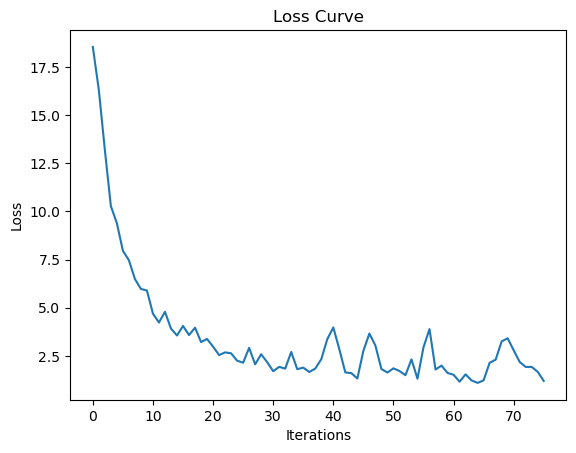

In [27]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame, and it contains the features and the target label

# Prepare data (X = features, y = labels)
X = df.drop(columns=['Stress_Label', 'PP', 'timestamp'])  # Drop non-feature columns
y = df['Stress_Label']  # Your target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning the MLP model
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300],
    'solver': ['adam'],
    'early_stopping': [True, False],  # Add early stopping
    'validation_fraction': [0.1, 0.2]  # For early stopping, define validation fraction
}

# Initialize MLPClassifier with early stopping
mlp = MLPClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with grid search and track the training process
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)

# Print the classification report for the test set
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Set Accuracy:", best_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

# Plotting the loss curves (training loss vs. validation loss)
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


In [28]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install --upgrade scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 326.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/11.0 MB 512.0 kB/s eta 0:00:22
   ---------------------------------------- 0.1/11.0 MB 512.0 kB/s eta 0:00:22
    --------------------------------------- 0.2/11.0 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.3/11.0 MB 874.6 kB/s eta 0:00:13
   - -------------------------------------- 0.5/11.0 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.0 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/11.0 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.0 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/11.0 MB 2.2 MB/s eta 0:00:05
   ----- -

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Dummy dataset (replace with your data)
# Assuming you have features in X and target in y
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_clusters_per_class=2,
    weights=[0.8, 0.2],  # Imbalanced dataset
    random_state=42
)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [300, 500],  # Increased max_iter to ensure convergence
    'solver': ['adam'],
    'early_stopping': [True, False],
    'validation_fraction': [0.1, 0.2],
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search on the balanced dataset
grid_search_mlp.fit(X_train_balanced, y_train_balanced)

# Get the best model from grid search
best_model_mlp = grid_search_mlp.best_estimator_

# Evaluate the model on the test set
y_pred_mlp = best_model_mlp.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_mlp))


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       0.89      0.91      0.90        46

    accuracy                           0.95       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.96      0.95      0.96       200



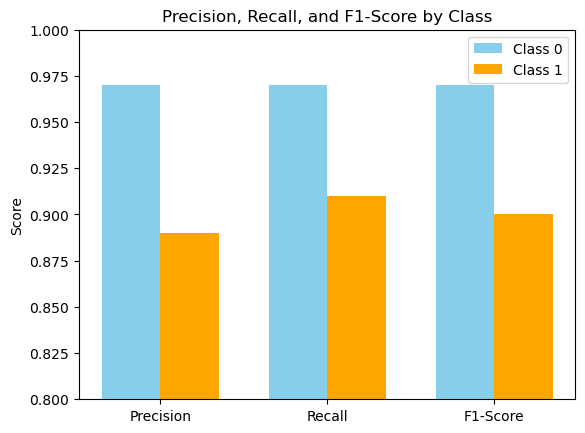

In [40]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Precision', 'Recall', 'F1-Score']
class_0 = [0.97, 0.97, 0.97]
class_1 = [0.89, 0.91, 0.90]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, class_0, width, label='Class 0', color='skyblue')
plt.bar(x + width/2, class_1, width, label='Class 1', color='orange')

plt.xticks(x, metrics)
plt.ylim(0.8, 1.0)
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score by Class')
plt.legend()
plt.show()


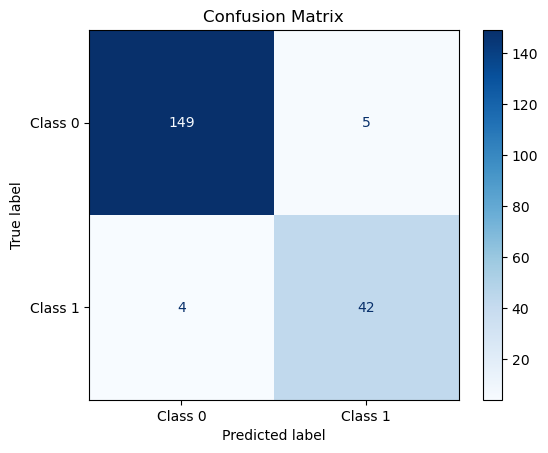

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


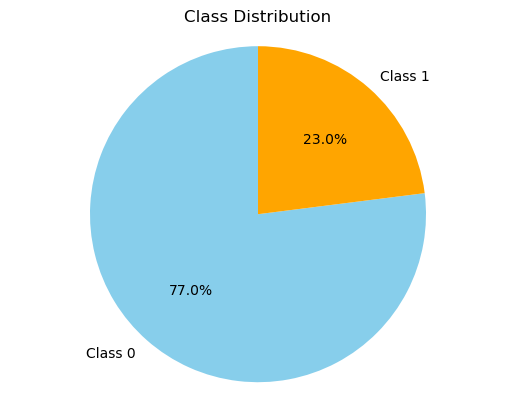

In [42]:
class_counts = [154, 46]  # Support values for Class 0 and Class 1
labels = ['Class 0', 'Class 1']

plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.axis('equal')
plt.show()


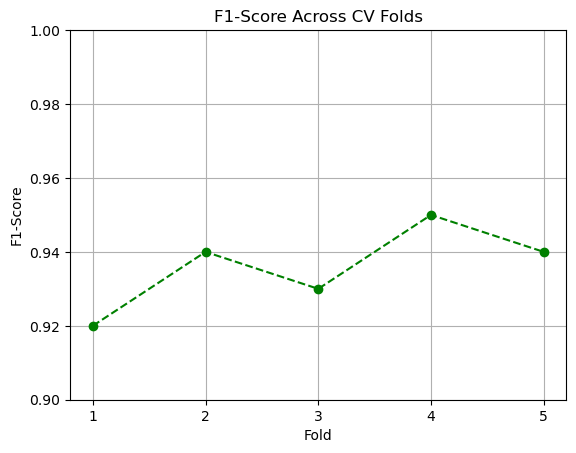

In [43]:
cv_results = [0.92, 0.94, 0.93, 0.95, 0.94]  # Example CV fold F1-scores
folds = range(1, len(cv_results) + 1)

plt.plot(folds, cv_results, marker='o', linestyle='--', color='green')
plt.xticks(folds)
plt.ylim(0.9, 1.0)
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.title('F1-Score Across CV Folds')
plt.grid()
plt.show()


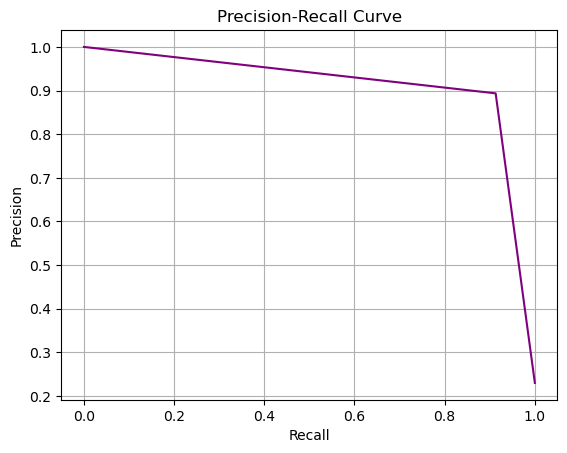

In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_mlp)
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


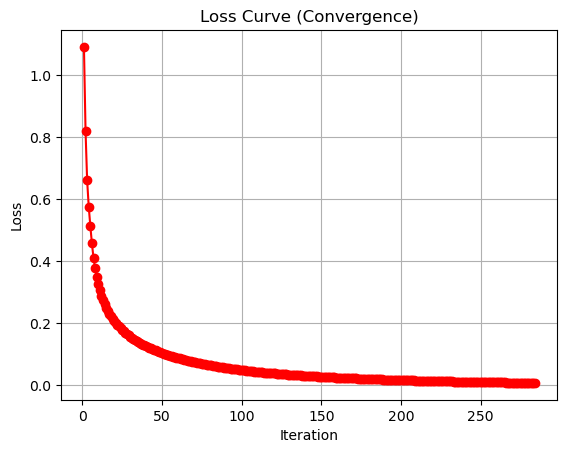

In [45]:
mlp_loss_curve = best_model_mlp.loss_curve_

plt.plot(range(1, len(mlp_loss_curve) + 1), mlp_loss_curve, marker='o', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve (Convergence)')
plt.grid()
plt.show()


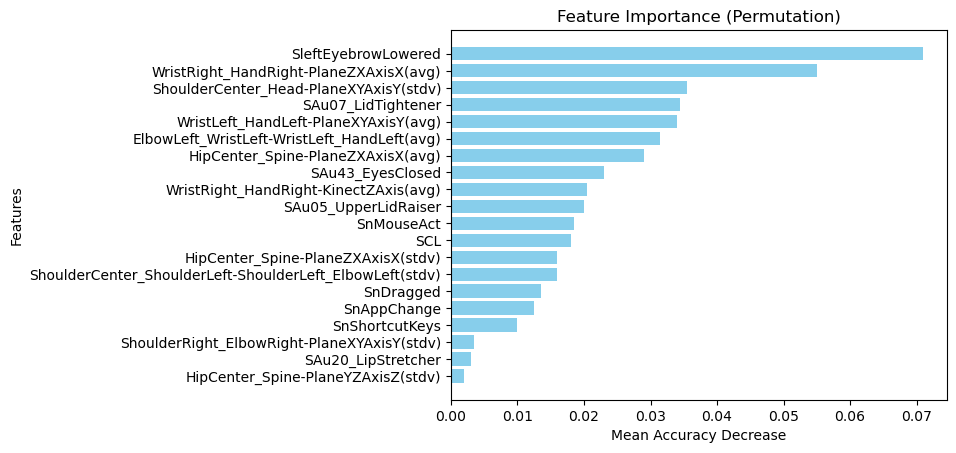

In [48]:
important_features = [
    'SnDragged', 'SCL', 'WristLeft_HandLeft-PlaneXYAxisY(avg)', 'SAu43_EyesClosed', 'HipCenter_Spine-PlaneZXAxisX(avg)',
    'SAu05_UpperLidRaiser', 'HipCenter_Spine-PlaneZXAxisX(stdv)', 'SnMouseAct', 'SAu07_LidTightener', 'ShoulderCenter_Head-PlaneXYAxisY(stdv)',
    'SnShortcutKeys', 'ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv)', 'SleftEyebrowLowered', 'HipCenter_Spine-PlaneYZAxisZ(stdv)',
    'SAu20_LipStretcher', 'WristRight_HandRight-PlaneZXAxisX(avg)', 'WristRight_HandRight-KinectZAxis(avg)', 'SnAppChange', 
    'ShoulderRight_ElbowRight-PlaneXYAxisY(stdv)', 'ElbowLeft_WristLeft-WristLeft_HandLeft(avg)', 'SnMouseDistance', 'SrightEyebrowLowered',
    'SrightEyebrowRaised', 'SnLeftClicked', 'SnWheel', 'SnRightClicked', 'SnDoubleClicked', 'Ssurprised', 'Sangry', 'Shappy',
    'Sscared', 'Sdisgusted', 'Svalence', 'SxHeadOrientation', 'SyHeadOrientation', 'SleftEyeClosed', 'SrightEyeClosed',
    'SleftEyebrowRaised', 'SrightEyebrowLowered', 'SleftEyebrowLowered', 'SnKeyStrokes', 'SnKeyStrokes'
]

# Sort importance values
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
plt.barh([important_features[i] for i in sorted_idx], perm_importance.importances_mean[sorted_idx], color='skyblue')
plt.xlabel('Mean Accuracy Decrease')
plt.ylabel('Features')
plt.title('Feature Importance (Permutation)')
plt.show()


In [49]:
pip install shap


   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   --- ------------------------------------ 41.0/456.2 kB 1.9 MB/s eta 0:00:01
   --- ------------------------------------ 41.0/456.2 kB 1.9 MB/s eta 0:00:01
   --- ------------------------------------ 41.0/456.2 kB 1.9 MB/s eta 0:00:01
   --- ------------------------------------ 41.0/456.2 kB 1.9 MB/s eta 0:00:01
   --- ------------------------------------ 41.0/456.2 kB 1.9 MB/s eta 0:00:01
   --- ------------------------------------ 41.0/456.2 kB 1.9 MB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.2 kB 544.7 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.2 kB 544.7 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.2 kB 544.7 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.2 kB 544.7 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.2 kB 544.7 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.2 k

In [ ]:
pip install notebook jupyterlab


  0%|          | 0/50 [00:00<?, ?it/s]

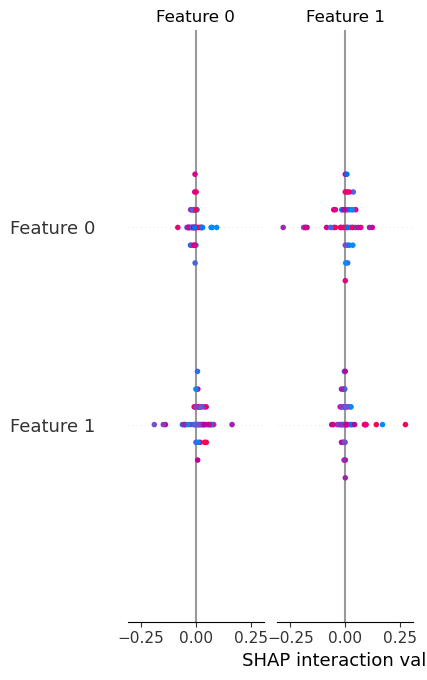

In [51]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.KernelExplainer(best_model_mlp.predict_proba, X_train[:100])  # Use a subset for performance
shap_values = explainer.shap_values(X_test[:50])  # Use a small subset for visualization

# Static feature importance plot
shap.summary_plot(shap_values, X_test[:50], plot_type="bar")
